***DATA UNDERSTANDING***

Order_ID          0
Customer_ID       0
Postal_Code       0
Product_ID        0
Sales             0
Quantity          0
Discount          0
Profit            0
Category          0
Sub-Category      0
Product_Name      0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_Name     0
Segment           0
Country/Region    0
City              0
State             0
Region            0
dtype: int64
1
0


C:\Users\HoaxBerries\AppData\Local\Temp\ipykernel_14376\150144256.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


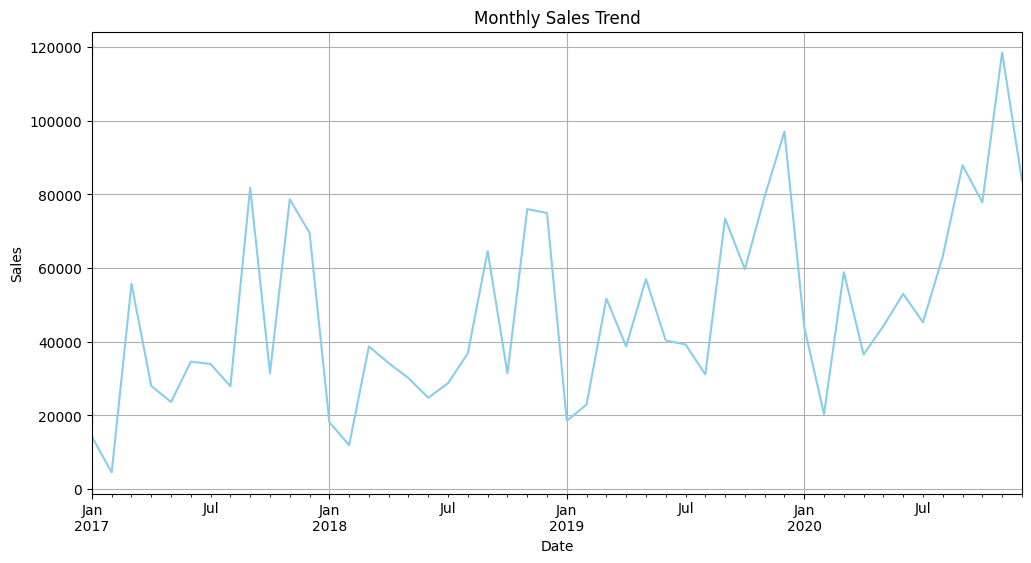

Total Pesanan: 9993
Total Penjualan: $2,296,919.49
Rata-rata Penjualan per Pesanan: $458.56
Total Keuntungan: $286,409.08


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset
url = "https://raw.githubusercontent.com/Khalis189/Data-Analyst-Journey_Segmentation/refs/heads/main/SuperStore%20-%20data.csv"

df = pd.read_csv(url)

# Cek missing value
print(df.isna().sum()) 

# Cek duplikasi data
print(df.duplicated().sum())

# Menghapus duplikasi data
df.drop_duplicates(inplace=True)

# Cek kembali duplikasi data
print(df.duplicated().sum())

# Mengonversi Order_Date ke datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Menyimpan kembali CSV
df.to_csv('superstore_data.csv', index=False)

# Mengatur Order_Date sebagai indeks
df.set_index('Order_Date', inplace=True)

# Resample data penjualan per bulan dan plot tren penjualan
monthly_sales = df['Sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Menghitung total pesanan
total_orders = df['Order_ID'].count()

# Menghitung total penjualan
total_sales = df['Sales'].sum()

# Menghitung rata-rata penjualan per pesanan
average_sales_per_order = df.groupby('Order_ID')['Sales'].sum().mean()

# Menghitung total keuntungan
total_profit = df['Profit'].sum()

# Menampilkan hasil
print(f"Total Pesanan: {total_orders}")
print(f"Total Penjualan: ${total_sales:,.2f}")
print(f"Rata-rata Penjualan per Pesanan: ${average_sales_per_order:,.2f}")
print(f"Total Keuntungan: ${total_profit:,.2f}")

***EKSPLORASI SEGMENT***

In [67]:
# Mengetahui segmentasi dengan sales & profit tertinggi
segment = ['Consumer', 'Corporate', 'Home Office']
for i in segment:
    segment_sales = df[df['Segment'] == i]['Sales'].sum()
    segment_profit = df[df['Segment'] == i]['Profit'].sum()
    print(f"Total Sales {i}: ${segment_sales:,.2f}")
    print(f"Total Profit {i}: ${segment_profit:,.2f}")

Total Sales Consumer: $1,161,401.34
Total Profit Consumer: $134,119.21
Total Sales Corporate: $706,146.37
Total Profit Corporate: $91,979.13
Total Sales Home Office: $429,371.78
Total Profit Home Office: $60,310.74


Segment **Consumer** menyumbang profit tertinggi, berangkat dari potensi ini kita perlu analisis lebih lanjut, misal apakah terdapat ketimpangan yang terjadi untuk setiap **Region** pada segment **Consumer**, dan apakah awareness **Discount** terhadap setiap region sudah merata?

NOTES: Dapat dibuat visual diagram batang untung memperlihatkan profit ketiga segment dan fokuskan pada segment Consumer

Selanjutnya, kita perlu meninjau kembali apa yang dapat kita kembangkan dari segment **Consumer** agar dapat meningkatkan profit dengan efisien

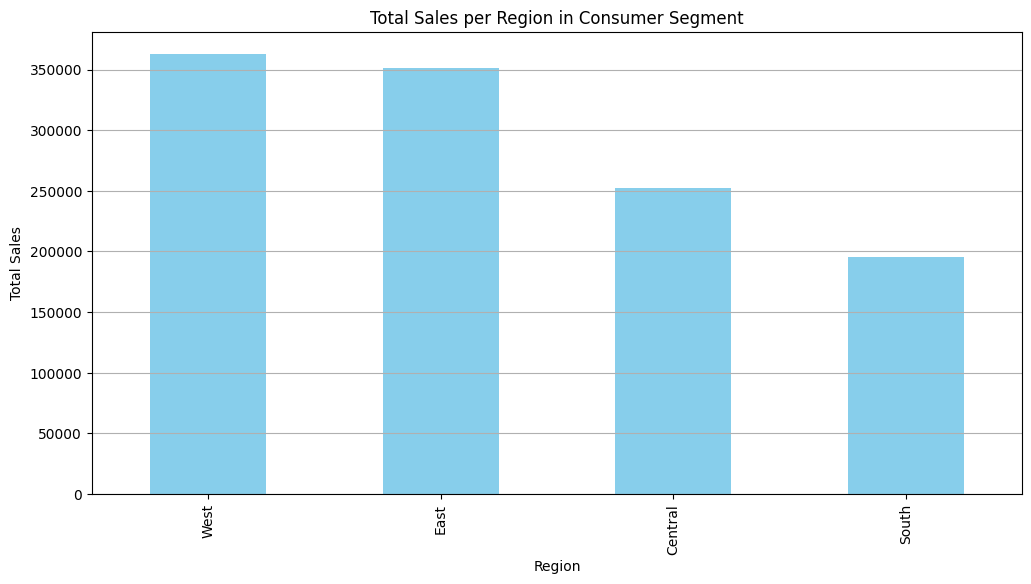

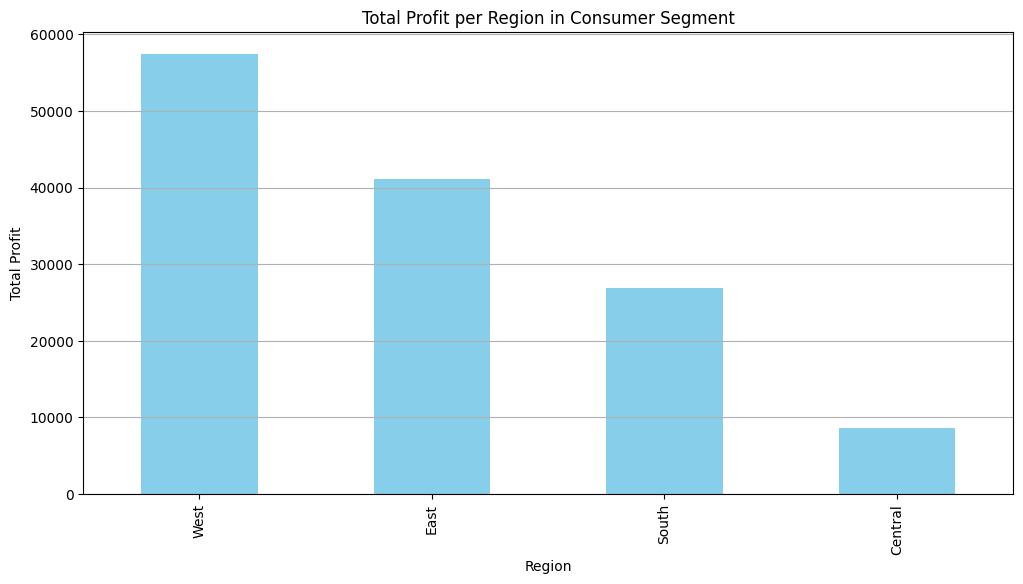

In [49]:
# Mengetahui Region dengan sales tertinggi pada Segment Consumer
segment_consumer = df[df['Segment'] == 'Consumer']
region_sales = segment_consumer.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_profit = segment_consumer.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Menampilkan hasil
plt.figure(figsize=(12, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Region in Consumer Segment')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

# Menampilkan hasil
plt.figure(figsize=(12, 6))
region_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit per Region in Consumer Segment')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.grid(axis='y')
plt.show()


Terdapat 2 hal kita dapat dari data tersebut:

1. Region **West** memiliki Sales dan Profit yang tinggi dan Region **Central** memiliki Sales sedang dan Profit yang rendah. Melalui hal ini kita bisa melanjutkan untuk mencari tau apa yang mempengaruhi kecilnya Profit region **Central**, kita bisa melihat total **Discount** yang digunakan antara region **West** dan region **Central**, selanjutnya dapat melihat trend penjualan dan profit agar dapat menentukan timing yang tepat untuk melakukan promosi.
2. Total sales pada region **West** dan region **East** tidak terpaut terlalu jauh, akan tetapi profit yang mereka hasilkan memiliki jarak yang lumayan. Mengenai hal ini dapat ditelusuri kembali apakah terdapat discount yang tidak tepat sasaran, atau biaya operasional pada region **East** belum efisien.

In [50]:
# Mengetahui perbandingan total disount antara region west dan central pada Segment Consumer
region_west = segment_consumer[segment_consumer['Region'] == 'West']
region_central = segment_consumer[segment_consumer['Region'] == 'Central']

# Menghitung total discount per region
total_discount_west = region_west['Discount'].sum()
total_discount_central = region_central['Discount'].sum()

# Menampilkan hasil
print(f"Total Discount in West Region: ${total_discount_west:,.2f}")
print(f"Total Discount in Central Region: ${total_discount_central:,.2f}")


Total Discount in West Region: $179.75
Total Discount in Central Region: $305.46


Dapat disimpulkan pada region **Central**, **awareness terhadap discount** terpaut **tinggi**. Hal ini mengindikasi bahwa pemberian promosi dirasa **tidak tepat sasaran**, sehingga **tidak cukup** untuk meningkatkan sales dan profit pada timeframe tertentu